In [9]:
#Histograms for I at V for each Identifier


print("starting Histograms...")
import custom_analyzer as canal
import time
import matplotlib.pyplot as plt
import custom_pathlibrary as cpath
import numpy as np
import math
import os

target_V = 50.0  # Voltage at which to get the current values
A_bins = 300 # Number of bins for the histogram
folder = f"figs/histograms/target_{target_V}V/"

path = cpath.PLib()
identifier = path.dieNr_to_identifier

files = canal.get_all_filenames(startdir= "data_storage/")
dataset = canal.Dataset()
dataset.add_files(files=files, only_measurements=True)



for i in identifier:

    plt.ioff()
    filename = f"all_{i}_histogram_at_{target_V}V.png"
    if not os.path.isdir(str(folder)):
        os.makedirs(str(folder))
    else:
        pass

    fig = plt.figure(figsize=[16, 9])

    for j in [25,]:
        slicename, slice = dataset.filter(parameter="identifier", value=i)
        dataset.filter_slice(target_slice_name=slicename, parameter="temp_at_end", value=j)
        dataset.clean_slice_data_rbias(target_slice_name=slicename, files=False, taken=False, reverse=False)
        I_list=dataset.get_I_at_V(target_slice_name=slicename, voltage=target_V)
        # Use logarithmically spaced bins
        I_list = sorted(I_list)
        # Remove all negative entries from I_list
        I_list = [k for k in I_list if k > 0]
        #print(f"sorted I_list at {j}°C: {I_list}")
        log_bins = np.logspace(np.log10(I_list[0]), np.log10(I_list[-1]), A_bins + 1)
        plt.hist(I_list, bins=log_bins, alpha=0.4, label=f"taken {j}°C", histtype='bar', edgecolor='black')
        
        slicename, slice = dataset.filter(parameter="identifier", value=i)
        dataset.filter_slice(target_slice_name=slicename, parameter="temp_at_end", value=j)
        dataset.clean_slice_data_rbias(target_slice_name=slicename, files=False, taken=True, reverse=True)
        I_list=dataset.get_I_at_V(target_slice_name=slicename, voltage=target_V)
        # Use logarithmically spaced bins
        I_list = sorted(I_list)
        # Remove all negative entries from I_list
        I_list = [k for k in I_list if k > 0]
        #print(f"sorted I_list at {j}°C: {I_list}")
        log_bins = np.logspace(np.log10(I_list[0]), np.log10(I_list[-1]), A_bins + 1) if len(I_list) > 3 else A_bins
        #plt.hist(I_list, bins=log_bins, alpha=0.4, label=f"outliers {j}°C", histtype='bar', edgecolor='red')


    plt.legend()
    plt.legend(fontsize=10, loc="best", ncols=8)#, bbox_to_anchor=(0.6, -0.1))

    plt.title(f"identifier {i} - I Hist at {target_V}V", fontsize=20)
    plt.yscale("linear")
    #plt.xscale("linear")
    plt.xscale("log")
    #plt.xlim(left=40, right=48)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')   
    plt.xlabel("Current (A)")
    plt.ylabel("Counts")
    plt.grid(True)
    fig.set_facecolor('w')
    fig.savefig(os.path.join(folder, filename) if folder else filename, bbox_inches='tight', dpi=500)
    plt.close(fig)
    print(f"Graph saved to {os.path.join(folder, filename) if folder else filename}")

starting Histograms...
len target_slice 608
Cleaning slice filter_identifier_range_None_value_04E10 with 608 entries
len cleaned_t_s 511
Yield of cleaned slice filter_identifier_range_None_value_04E10: 84.05%
len target_slice 608
Cleaning slice filter_identifier_range_None_value_04E10 with 608 entries
len cleaned_t_s 74
Yield of cleaned slice filter_identifier_range_None_value_04E10: 12.17%
Graph saved to figs/histograms/target_50.0V/all_04E10_histogram_at_50.0V.png
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E20 with 625 entries
len cleaned_t_s 531
Yield of cleaned slice filter_identifier_range_None_value_04E20: 84.96%
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E20 with 625 entries
len cleaned_t_s 69
Yield of cleaned slice filter_identifier_range_None_value_04E20: 11.04%
Graph saved to figs/histograms/target_50.0V/all_04E20_histogram_at_50.0V.png
len target_slice 624
Cleaning slice filter_identifier_range_None_value_04C10 with

In [2]:
#Histograms for I at V for each Identifier in one big 2d hist


print("starting Histograms...")
import custom_analyzer as canal
import time
import matplotlib.pyplot as plt
import custom_pathlibrary as cpath
import numpy as np
import math
import os

target_V = 40.0  # Voltage at which to get the current values
A_bins = 250  # Number of bins for the histogram
folder = f"figs/histograms_2d/"

path = cpath.PLib()
identifier = path.dieNr_to_identifier

files = canal.get_all_filenames(startdir= "data_storage/")
dataset = canal.Dataset()
dataset.add_files(files=files, only_measurements=True)

x_list = []
y_list = []
x_bins = []
y_bins = []

y_ticks = []
y_ticks_labels = []

row = 0

plt.ioff()
filename = f"all_identifiers_histogram_at_{target_V}V.png"
if not os.path.isdir(str(folder)):
    os.makedirs(str(folder))
else:
    pass

fig = plt.figure(figsize=[15, 9])

for i in identifier:
    row += 1
    y_bins.append(row)
    y_ticks.append(row)
    

    for j in [25,]:
        y_ticks_labels.append(f"{i} at {j}°C")
        #plt.text(0, row, i, color="r", ha="center", va="center", fontweight="bold")



        slicename, slice = dataset.filter(parameter="identifier", value=i)
        dataset.filter_slice(target_slice_name=slicename, parameter="temp_at_end", value=j)
        dataset.clean_slice_data_rbias(target_slice_name=slicename, files=False, taken=True, reverse=False)
        I_list=dataset.get_I_at_V(target_slice_name=slicename, voltage=target_V)
        # Use logarithmically spaced bins
        I_list = sorted(I_list)
        # Remove all negative entries from I_list
        I_list = [k for k in I_list if k > 0]
        for k in I_list:
            x_list.append(k)
            y_list.append(row)
        


tmp_x_list = sorted(x_list)
# Remove all negative entries from I_list
#print(f"sorted I_list at {j}°C: {I_list}")
x_bins = np.logspace(np.log10(tmp_x_list[0]), np.log10(tmp_x_list[-1]), A_bins + 1)

plt.hist2d(x_list, y_list, bins=[x_bins, y_bins], cmin=1, norm='log')

print(f"ticks: {y_ticks}")
print(f"labels: {y_ticks_labels}")
#plt.yticks(ticks=y_ticks, labels=y_ticks_labels)


plt.colorbar(label='Counts')
print("1")
plt.title(f"Hist at {target_V}V", fontsize=20)
plt.yscale("linear")
#plt.xscale("linear")
plt.xscale("log")
print("2")
#plt.xlim(left=40, right=48)
plt.axhline(0, color='black')
plt.axvline(0, color='black')   
plt.xlabel("Current (A)")
plt.ylabel("Identifier")
plt.grid(True)
print("3")
#fig.set_facecolor('w')
print("4")
fig.savefig(os.path.join(folder, filename) if folder else filename, bbox_inches='tight', dpi=300, transparent=False)
print("5")
plt.close(fig)
print(f"Graph saved to {os.path.join(folder, filename) if folder else filename}")

starting Histograms...
len target_slice 608
Cleaning slice filter_identifier_range_None_value_04E10 with 608 entries
len cleaned_t_s 511
Yield of cleaned slice filter_identifier_range_None_value_04E10: 84.05%
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E20 with 625 entries
len cleaned_t_s 531
Yield of cleaned slice filter_identifier_range_None_value_04E20: 84.96%
len target_slice 624
Cleaning slice filter_identifier_range_None_value_04C10 with 624 entries
len cleaned_t_s 530
Yield of cleaned slice filter_identifier_range_None_value_04C10: 84.94%
len target_slice 624
Cleaning slice filter_identifier_range_None_value_04C20 with 624 entries
len cleaned_t_s 525
Yield of cleaned slice filter_identifier_range_None_value_04C20: 84.13%
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E05 with 625 entries
len cleaned_t_s 526
Yield of cleaned slice filter_identifier_range_None_value_04E05: 84.16%
len target_slice 625
Cleaning slice filter_iden

In [ ]:
#Histograms for I at V for each Identifier in one big 2d hist


print("starting Histograms...")
import custom_analyzer as canal
import time
import matplotlib.pyplot as plt
import custom_pathlibrary as cpath
import numpy as np
import math
import os

target_V = 40.0  # Voltage at which to get the current values
A_bins = 500  # Number of bins for the histogram
folder = f"figs/histograms_2d/"

path = cpath.PLib()
identifier = path.dieNr_to_identifier

files = canal.get_all_filenames(startdir= "data_storage/")
dataset = canal.Dataset()
dataset.add_files(files=files, only_measurements=True)

x_list = []
y_list = []
x_bins = []
y_bins = []

y_ticks = []
y_ticks_labels = []

row = 0
def y_formatter(x, pos):
    """Format the y-ticks to show the identifier."""
    global y_ticks_labels
    if x < len(y_ticks_labels):
        return y_ticks_labels[int(x)]
    else:
        return f"Identifier {int(x)}"
plt.ioff()
filename = f"all_identifiers_histogram_at_{target_V}V.png"
if not os.path.isdir(str(folder)):
    os.makedirs(str(folder))
else:
    pass

fig, ax1 = plt.subplots(1, 1, figsize=(16,9), dpi=80)

for i in identifier:
    row += 1
    y_bins.append(row)
    y_ticks.append(row)
    y_ticks_labels.append(i)

    for j in [25,]:
        slicename, slice = dataset.filter(parameter="identifier", value=i)
        dataset.filter_slice(target_slice_name=slicename, parameter="temp_at_end", value=j)
        dataset.clean_slice_data_rbias(target_slice_name=slicename, files=False, taken=True, reverse=False)
        I_list=dataset.get_I_at_V(target_slice_name=slicename, voltage=target_V)
        # Use logarithmically spaced bins
        I_list = sorted(I_list)
        # Remove all negative entries from I_list
        I_list = [k for k in I_list if k > 0]
        for k in I_list:
            x_list.append(k)
            y_list.append(row)
        


tmp_x_list = sorted(x_list)
# Remove all negative entries from I_list
#print(f"sorted I_list at {j}°C: {I_list}")
x_bins = np.logspace(np.log10(tmp_x_list[0]), np.log10(tmp_x_list[-1]), A_bins + 1)

im = ax1.hist2d(x_list, y_list, bins=[x_bins, y_bins], cmin=1)

print(f"ticks: {y_ticks}")
print(f"labels: {y_ticks_labels}")
ax1.set_yticks(y_ticks, y_ticks)
#ax1.set_yticklabels(y_ticks_labels)


ax1.set_title(f"identifier {i} - I Hist at {target_V}V", fontsize=20)
ax1.set_yscale("linear")
#ax1.set_xscale("linear")
ax1.set_xscale("log")
#plt.xlim(left=40, right=48)
ax1.axhline(0, color='black')
ax1.axvline(0, color='black')
ax1.set_xlabel("Current (A)")
ax1.set_ylabel("Identifier")
ax1.grid(True)
fig.set_facecolor('w')
fig.colorbar(im[-1], ax=ax1, label='Counts')
fig.savefig(os.path.join(folder, filename) if folder else filename, bbox_inches='tight', dpi=500)
plt.close(fig)
print(f"Graph saved to {os.path.join(folder, filename) if folder else filename}")

starting Histograms...
len target_slice 608
Cleaning slice filter_identifier_range_None_value_04E10 with 608 entries
len cleaned_t_s 511
Yield of cleaned slice filter_identifier_range_None_value_04E10: 84.05%
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E20 with 625 entries
len cleaned_t_s 531
Yield of cleaned slice filter_identifier_range_None_value_04E20: 84.96%
len target_slice 624
Cleaning slice filter_identifier_range_None_value_04C10 with 624 entries
len cleaned_t_s 530
Yield of cleaned slice filter_identifier_range_None_value_04C10: 84.94%
len target_slice 624
Cleaning slice filter_identifier_range_None_value_04C20 with 624 entries
len cleaned_t_s 525
Yield of cleaned slice filter_identifier_range_None_value_04C20: 84.13%
len target_slice 625
Cleaning slice filter_identifier_range_None_value_04E05 with 625 entries
len cleaned_t_s 526
Yield of cleaned slice filter_identifier_range_None_value_04E05: 84.16%
len target_slice 625
Cleaning slice filter_iden

14312 files found
Number of data points: 2375


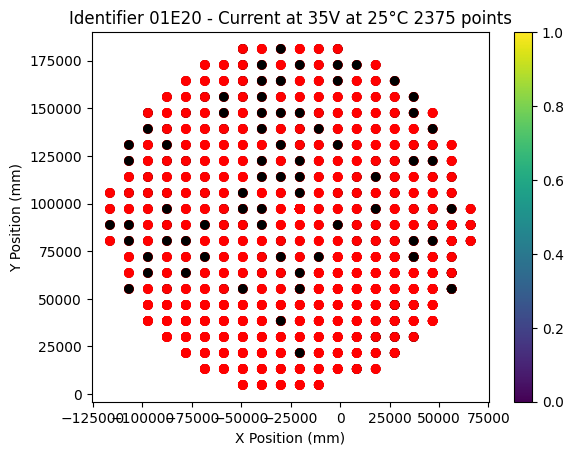

In [ ]:
## Current at V for each Identifier at a specific temperature over whole wafer


import json
import matplotlib.pyplot as plt
import os
import custom_analyzer as canal
import custom_pathlibrary as cpath
import matplotlib
import numpy as np

temp = 25  # Temperature in °C
target_voltage = 35  # Voltage in V



fig, ax = plt.subplots()
x = []
y = []
c = []
files = canal.get_all_filenames(startdir="data_storage/")
print(len(files), "files found")
for i in files:
    if i.endswith(".json") and "IV_" in i:
        with open(i, 'r') as f:
            db = json.load(f)
        if db['temp_at_end'] == temp and db['identifier'] == "01E20":
            current = db["iv_data_rbias"]
            for voltage, current_value in current:
                if voltage == target_voltage and current_value > 0:
                    if current_value > 1e-12:
                        c.append("r")
                    else:
                        c.append("k")
    #                    c.append(np.sqrt(np.sqrt(float(current_value))))
                    x.append(float(db["x_pos"]))
                    y.append(float(db["y_pos"]))
print(f"Number of data points: {len(x)}")
#x,y,c = np.transpose ([(float(db['x_pos']),float(db['y_pos']), float(db['fit_f:n'])) for item,db in slice.items()])
cs=plt.scatter(x,y,c=c)
fig.colorbar(cs)
plt.title(f"Identifier 01E20 - Current at {target_voltage}V at {temp}°C {len(c)} points")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()